<a href="https://colab.research.google.com/github/larasmrwn/Resume-Classification/blob/master/ResumeClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resume Classification

Usually recruiters need time to do a resume screening. Here, I, hands on with pacmann.ai, made a small project, namely Resume Classification. From this Resume Classification, we try to make the resume screening process faster, so we just need to put this resume into the machine learning model, and this machine learning model will classify the resume into a category. However, this project still needs further development so that the classification results are more accurate. The classification using K-Neighbors Classifier.

In [149]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Load Data

In [151]:
dataSet = pd.read_csv('/content/drive/MyDrive/Belajar/DataScience/ResumeClassification/ResumeDataSet.csv')
dataSet.head(10) #menampilkan 10 data teratas

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...


In [152]:
dataSet.info() #Melihat informasi data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


Bersasarkan informasi yang ada kita bisa melihat bahwa:
*   Terdapat 962 resume
*   Terdapat kolom Category dan Resume di mana masing-masing Non-Null (tidak kosong)



In [153]:
dataSet.isnull().sum() # Melihat keseluruhan apakah ada data yang Null (kosong)

Category    0
Resume      0
dtype: int64

In [154]:
dataSet["Category"].value_counts() #Mengecek terdapat kategori apa saja dan ada berapa data di setiap kategori (uniquesnya ada apa saja dan counts-nya)

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

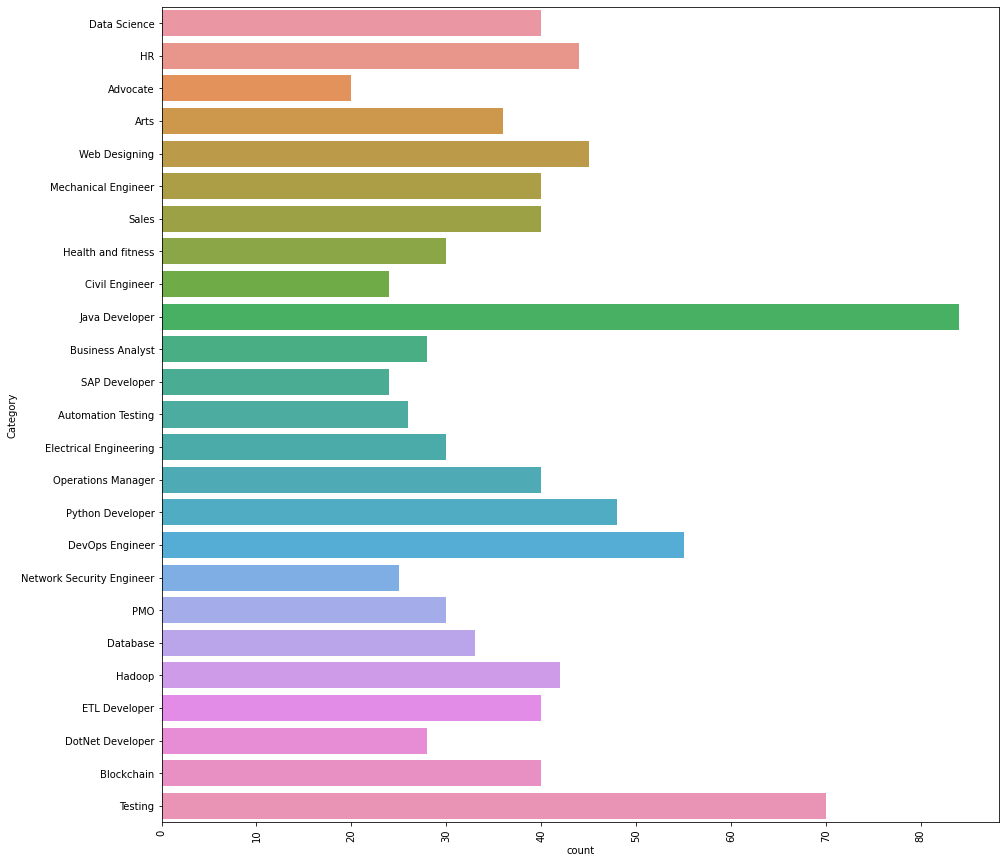

In [155]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data = dataSet) # Plot-ing bearapa banyak kategori dalam bentuk bar dan datanya dari dataSet 

In [156]:
dataSet["Resume"]

0      Skills * Programming Languages: Python (pandas...
1      Education Details \r\nMay 2013 to May 2017 B.E...
2      Areas of Interest Deep Learning, Control Syste...
3      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4      Education Details \r\n MCA   YMCAUST,  Faridab...
                             ...                        
957    Computer Skills: â¢ Proficient in MS office (...
958    â Willingness to accept the challenges. â ...
959    PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP/7/8/8.1/10 Database MY...
Name: Resume, Length: 962, dtype: object

Cleaning Resume Text

In [157]:
dataSet["cleanedText"] = '' # Kolom baru untuk menyimpan data hasil pembersihan teks

In [158]:
import re

def clean_resume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [159]:
clean_resume("Choosing       https://seaborn.pydata.org/tutorial/color_palettes.html   color palettes")

'Choosing color palettes'

In [160]:
dataSet["clean_resume"] = dataSet["Resume"].apply(clean_resume) # Mengaplikasikan fungsi clean_resume ke setiap baris data Resume dan disimpan di clean_resume 
dataSet["clean_resume"][1]

'Education Details May 2013 to May 2017 B E UIT RGPV Data Scientist Data Scientist Matelabs Skill Details Python Exprience Less than 1 year months Statsmodels Exprience 12 months AWS Exprience Less than 1 year months Machine learning Exprience Less than 1 year months Sklearn Exprience Less than 1 year months Scipy Exprience Less than 1 year months Keras Exprience Less than 1 year monthsCompany Details company Matelabs description ML Platform for business professionals dummies and enthusiasts 60 A Koramangala 5th block Achievements Tasks behind sukh sagar Bengaluru India Developed and deployed auto preprocessing steps of machine learning mainly missing value treatment outlier detection encoding scaling feature selection and dimensionality reduction Deployed automated classification and regression model linkedin com in aditya rathore b4600b146 Reasearch and deployed the time series forecasting model ARIMA SARIMAX Holt winter and Prophet Worked on meta feature extracting problem github co

In [161]:
dataSet["Resume"][1]

'Education Details \r\nMay 2013 to May 2017 B.E   UIT-RGPV\r\nData Scientist \r\n\r\nData Scientist - Matelabs\r\nSkill Details \r\nPython- Exprience - Less than 1 year months\r\nStatsmodels- Exprience - 12 months\r\nAWS- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year months\r\nSklearn- Exprience - Less than 1 year months\r\nScipy- Exprience - Less than 1 year months\r\nKeras- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Matelabs\r\ndescription - ML Platform for business professionals, dummies and enthusiasts.\r\n60/A Koramangala 5th block,\r\nAchievements/Tasks behind sukh sagar, Bengaluru,\r\nIndia                               Developed and deployed auto preprocessing steps of machine learning mainly missing value\r\ntreatment, outlier detection, encoding, scaling, feature selection and dimensionality reduction.\r\nDeployed automated classification and regression model.\r\nlinkedin.com/in/aditya-rathore-\r\nb4600b146        

In [162]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

one_set_stop_words = set(stopwords.words('english') + ['``', "''"])
total_words = []
sentences = dataSet['Resume'].values
cleanedSentences = ""

for i in range(0,160):
  cleanedText = clean_resume(sentences[i])
  cleanedSentences += cleanedText
  requiredWords = nltk.word_tokenize(cleanedText)
  for word in requiredWords:
    if word not in one_set_stop_words and word not in string.punctuation:
      total_words.append(word)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Skill', 166), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('I', 146), ('Education', 142), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('C', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('A', 84), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72)]


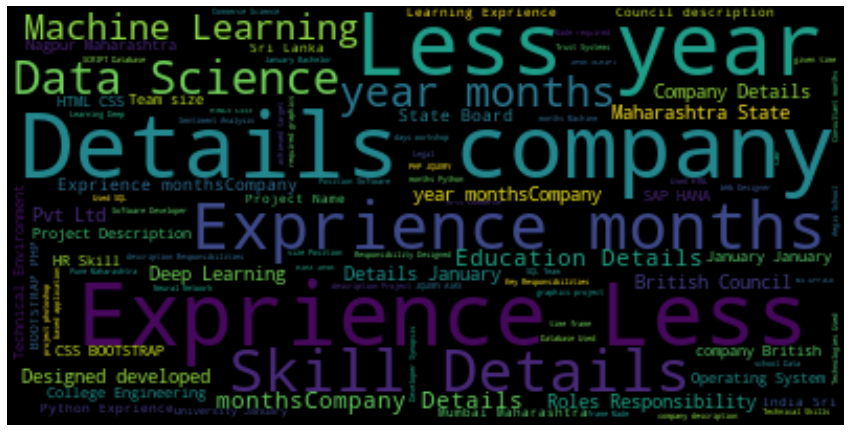

In [163]:
wordfreqdist = nltk.FreqDist(total_words)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

##Preparation Data for Classification

###Data Splitting
Data Splitting merupakan proses evaluasi, karena kita punya target klasifikasi jadi bisa cek apakah label output sesuai dengan datanya. Untuk itu kita butuh data testing yaitu data baru yang digunakan untuk memprediksi data yang sudah dilatih. Keluaran dari proses tesing ini adalah evaluasi model dalam bentuk beberapa matriks atau ukuran (ketepatan klasifikasi: Accuracy, Precision, Recall, F1 Score, dsb)

In [164]:
# Klasifikasi kategori (resume ini masuknya di kategori apa)

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = dataSet['clean_resume'].values
requiredTarget = dataSet['Category'].values

X_train,X_test,y_train,y_test = train_test_split(requiredText,requiredTarget,random_state=0, test_size=0.2) # Data training 80%, data testing 20%
print(X_train.shape)
print(X_test.shape)

(769,)
(193,)


###Feature Engineering
Feature Engineering ini merupakan proses pengolahan fitur yang kita punya (teks) menjadi numerik. Proses ini harus dilakukan karena pada proses modelling kita harus memasukkan input berupa numerik.

Apakah bisa melakukan Feature Engineering terlebih dahulu lalu melakukan Data Splitting? 
Bisa, tetapi khawatir akan terjadi data leakage. Data leakage harus dihindari pada saat ingin melakukan modelling karena data leakage ini dapat mengakibatkan hasil evaluasi yang cenderung bagus pada data testing.

Feature Engineering ini simpelnya akan membuatkan bobot kata, bila bobot katanya dibuat berdasarkan keseluruhan data lalu kita pecah, itu sama saja kita memberitahu cara berfikirnya si model di data testing, jadi hasilnya tidak bisa kita jadikan patokan, karena bisa jadi hasilnya bagus karena sudah diproses bersamaan. 

Tetapi ada kasus di mana kita melakukan Feature Engineering terlebih dahulu sebelum Data Splitting, namun tidak di semua kasus bisa dilakukan. Amannya kita melakukan Data Splitting terlebih dahulu baru Feature Engineering. 

In [165]:
word_vectorizer = TfidfVectorizer( #TfidfVectorizer berfungsi untuk menghitung bobot kata dari setiap barisnya
    #subliner_tf=True,
    stop_words = 'english',
    max_features = 1500
)

In [166]:
train_WordFeatures = word_vectorizer.fit_transform(X_train)
test_WordFeatures = word_vectorizer.transform(X_test)

print("Feature completed....")

Feature completed....


In [167]:
train_WordFeatures.shape

(769, 1500)

###Modelling

In [168]:
model = OneVsRestClassifier(KNeighborsClassifier()) #Inisialisasi object modelling

model.fit(train_WordFeatures, y_train) #Belajar data training

print('Accuracy of Kneighbors Classifier on training set: {:2f}'.format(model.score(train_WordFeatures, y_train))) #Cek score di data training 
print('Accuracy of Kneighbors Classifier on test set: {:2f}'.format(model.score(test_WordFeatures, y_test))) # Cek score di data testing

# #Cek score di data training  dan data testing  dengan membandingkan hasil prediksinya sama target sebenarnya yaitu di y_train dan y_test, untuk scorenya menggunakan Accuracy

Accuracy of Kneighbors Classifier on training set: 0.993498
Accuracy of Kneighbors Classifier on test set: 0.979275


###Prediction

In [169]:
! pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [170]:
from PyPDF2 import PdfFileReader, PdfFileWriter

file_path = '/content/drive/MyDrive/Belajar/DataScience/ResumeClassification/Resume_Larasati.pdf'

with open('CV_Larasati.txt') as f:
  lines = f.read()
print(lines)

Page: 1
----------------------------------------------------------------------------------------------------LARASATI  #THIS IS EXAMPLE CV  
A final year student currently who pursuing a Bachelor's degree in Computer Engineering, focusing on Internet of  
Things (IoT) and Computer Network Management from Universitas Multimedia Nusantara and Machine Learning  
from Bangkit Academy. I am i nterested in learning IoT, Computer Network, and Machine Learning that can be  
used in  daily  life.  
 
EDUCATIONAL  BACKGROUND  
UNIVERSITAS  MULTIMEDIA  NUSANTARA  
Computer  Engineering  Student  Tangerang, Indonesia  
 
CERTIFICATIONS  
TensorFlow:  Data  and  Deployment  Specialization  by Coursera  April 2022  
DeepLearning.AI  TensorFlow  Developer  Specialization  by Coursera  April  2022  
Mathematics  for Machine  Learning  Specialization by  Coursera  March  2022  
Google  IT Automation  with  Python  Specialization  by Coursera  March  2022  
 
  PROFESSIONAL  EXPERIENCE  
BANGKIT  ACADEMY

In [171]:
#Try with another resume
#lines = ".."

In [172]:
predict_word_vector = word_vectorizer.transform([lines])

In [173]:
model.predict(predict_word_vector)

array(['Data Science'], dtype='<U25')

Dataset and inspiration from: https://www.kaggle.com/datasets/dhainjeamita/updatedresumedataset

Hands on with: pacmann.ai